In [30]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [86]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d/airFoil_450'

xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05

In [87]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_450
airFoil_450_0
airFoil_450_1
airFoil_450_10
airFoil_450_11
airFoil_450_12
airFoil_450_13
airFoil_450_14
airFoil_450_15
airFoil_450_16
airFoil_450_17
airFoil_450_18
airFoil_450_19
airFoil_450_2
airFoil_450_20
airFoil_450_3
airFoil_450_4
airFoil_450_5
airFoil_450_6
airFoil_450_7
airFoil_450_8
airFoil_450_9
write airfoil2d/airFoil_450/input.npy


In [99]:
data=np.load(mainfolder+'/input.npy')

In [100]:
normal=np.amax(abs(data), axis=(0,1,2))
data=data*(1/normal)
print(normal)

[5.98564209e+02 2.23280396e+02 1.35999908e-13 1.02905297e+05
 1.46129626e+03 2.40107764e+03 5.40818751e-01]


In [101]:
modelfolder='cfdnetplus_models/model_newnorm'
model = tf.keras.models.load_model(modelfolder)

#normal=np.load(modelfolder+'normal.npy')
#model = tf.keras.models.load_model(modelfolder)

In [102]:
pred=model.predict(data)
pred=pred*normal
np.save(mainfolder+'/pred', pred)

1/1 [==============================] - 0s 104ms/step


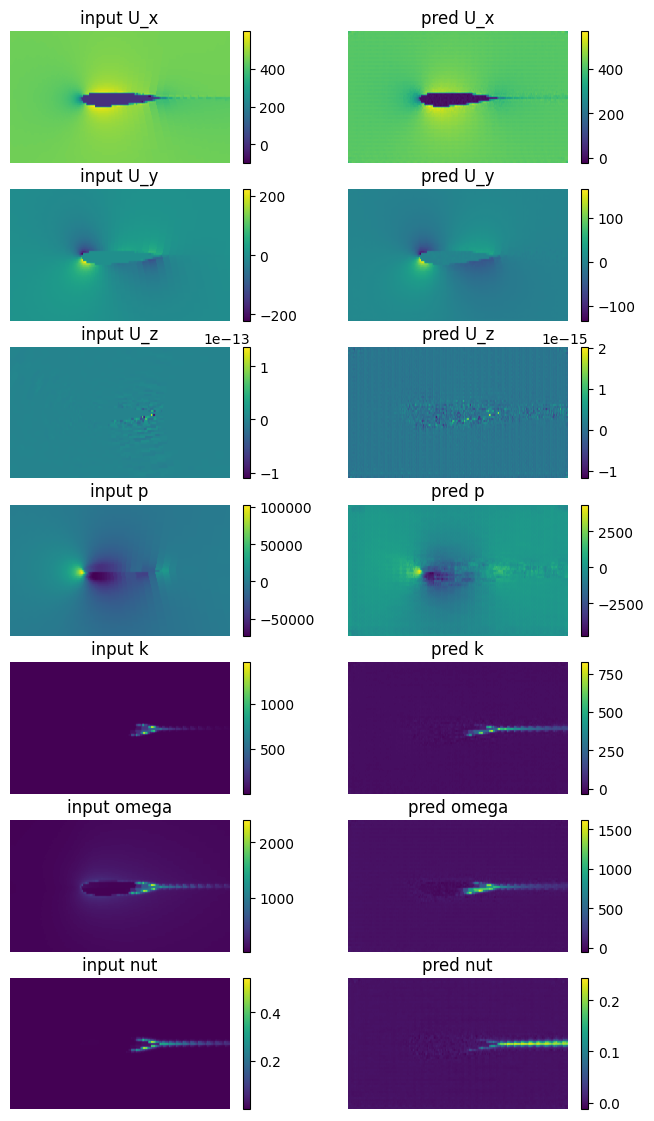

In [104]:
pred=np.load(mainfolder+'/pred.npy')
data=data*normal
n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [105]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_450_0
airFoil_450_1
airFoil_450_10
airFoil_450_11
airFoil_450_12
airFoil_450_13
airFoil_450_14
airFoil_450_15
airFoil_450_16
airFoil_450_17
airFoil_450_18
airFoil_450_19
airFoil_450_2
airFoil_450_20
airFoil_450_3
airFoil_450_4
airFoil_450_5
airFoil_450_6
airFoil_450_7
airFoil_450_8
airFoil_450_9
folder airfoil2d/airFoil_450/21 was created
write airfoil2d/airFoil_450/21/U
write airfoil2d/airFoil_450/21/p
write airfoil2d/airFoil_450/21/k
write airfoil2d/airFoil_450/21/omega
write airfoil2d/airFoil_450/21/nut
